# Explainable AI


## Scenario 1

In [6]:
#inladen data en getrained model
import pickle
with open("cache/data.pkl","rb") as f:
    dataset = pickle.load(f)

with open("cache/model.pkl", "rb") as f:
    model = pickle.load(f)

In [7]:
import shap
import numpy as np

clf = model.model
explainer = shap.Explainer(clf, dataset.x_train)
values = explainer.shap_values(dataset.x_train)

### Normale traffiek
Belangrijkste inputs voor het model om normale traffiek te voorspellen staan in het **blauw**.\
Inputs voor het model om abnormale traffiek te voorspellen staan in het **rood**.

De belangrijkste inputs zijn hier

- Frame.len: hoeveelheid data verstuurd
- packets_per_min: aantal berichten in de afgelopen minuut

In [8]:
#voorbeeld van normale trafiek
display(shap.force_plot(explainer.expected_value[1], values[1][10,:], dataset.x_train.iloc[10,:]))

### Scan
Eerst wordt er een scan uitgevoerd om te bepalen welke modbus devices op het netwerk zitten en wat hun bijbehorende IP adres is.\
Zo weet de hacker welke devices mogelijks een vulnerability hebben.

De inputs voor het model die leiden tot het voorspellen van een aanval zijn hier in het **rood** weergegeven.

In [9]:
y = dataset.y_train
attack_rows = y.index[y.label==1].tolist()
normal_rows = y.index[y.label==0].tolist()

#ARP scan
idx = attack_rows[5]
print(f"## row number: {idx}")
display(shap.force_plot(explainer.expected_value[1], values[1][idx,:], dataset.x_train.iloc[idx,:]))

## row number: 341


### Uitlezen registers
Vervolgens worden alle registers van een specifiek modbus device uitgelezen. Andere input waardes zijn van belang hier.

In [10]:
#poorten modbus uitlezen
idx = attack_rows[90]
print(f"## row number: {idx}")
display(shap.force_plot(explainer.expected_value[1], values[1][idx,:], dataset.x_train.iloc[idx,:]))

## row number: 2466


### Aanpassen registers
Vervolgens worden er een aantal registers overschreven door de aanvaller, opnieuw zien we dat andere input waardes van belang zijn hier.

In [11]:
#data registers overschrijven
idx = attack_rows[400]
print(f"## row number: {idx}")
display(shap.force_plot(explainer.expected_value[1], values[1][idx,:], dataset.x_train.iloc[idx,:]))

## row number: 3220


### Uitlezen registers
Tenslott worden de registers een laatste maal uitgelezen

In [12]:
#data registers uitlezen
idx = attack_rows[-1]
print(f"## row number: {idx}")
display(shap.force_plot(explainer.expected_value[1], values[1][idx,:], dataset.x_train.iloc[idx,:]))

## row number: 3697


### Gemiddeld belang van input

We kunnen kijken naar het gemiddeld belang van elke input over de hele dataset waar een ARP en NMAP scan plaatsvinden,\
alsook registers worden aangepast.

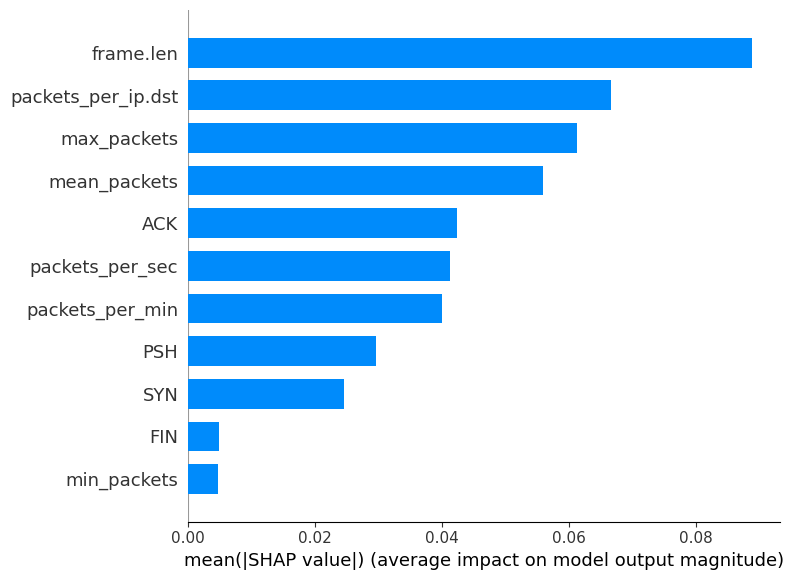

In [7]:
shap.summary_plot(values[1], dataset.x_train, class_names=model.get_class_names(), plot_type="bar")